In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as opencv
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(dirname, filename)
        print(os.path.join(dirname, filename))
        break
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-maps-restaurant-reviews reviews.csv
/kaggle/input/google-maps-restaurant-reviews/reviews.csv
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/outdoor_atmosphere my_friends_burger_fethi_duhan_calik.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/outdoor_atmosphere/my_friends_burger_fethi_duhan_calik.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/taste sardalye_efecan_kobo.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/taste/sardalye_efecan_kobo.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/menu nazar_cafe_kadir_turkoglu.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/menu/nazar_cafe_kadir_turkoglu.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/indoor_atmosphere cemo_etliekmek_mehmet_akyel.png
/kaggle/input/google-maps-restaurant-reviews/dataset/dataset/indoor_atmosphere/cemo_etliekmek_mehmet_akyel.png
/kaggle/input/google-maps-restaurant-reviews/sep

In [2]:
sns.set_palette("coolwarm")

## Reading in the dataset

In [3]:
complete_dataset = pd.read_csv('/kaggle/input/google-maps-restaurant-reviews/reviews.csv')
complete_dataset

business_name      author_name  \
0     Haci'nin Yeri - Yigit Lokantasi      Gulsum Akar   
1     Haci'nin Yeri - Yigit Lokantasi    Oguzhan Cetin   
2     Haci'nin Yeri - Yigit Lokantasi       Yasin Kuyu   
3     Haci'nin Yeri - Yigit Lokantasi       Orhan Kapu   
4     Haci'nin Yeri - Yigit Lokantasi       Ozgur Sati   
...                               ...              ...   
1095                       Miss Pizza     Salih Gursoy   
1096                       Miss Pizza  Kemal Amangeldi   
1097                       Miss Pizza       Ulkem Esen   
1098                       Miss Pizza     Ilkin Saymaz   
1099                       Miss Pizza     Samet Selcuk   

                                                   text  \
0     We went to Marmaris with my wife for a holiday...   
1     During my holiday in Marmaris we ate here to f...   
2     Prices are very affordable. The menu in the ph...   
3     Turkey's cheapest artisan restaurant and its f...   
4     I don't know what you will look for in terms o...   
...                                                 ...   
1095  There are so many types of pizza; you are surp...   
1096  I tried the smoked ribeye pizza; the dough is ...   
1097                       Crowded and expensive place.   
1098  No bad. It was very crowded; there was no ligh...   
1099  Excellent pizza and fine wine. Both food and b...   

                                                  photo  rating  \
0            dataset/taste/hacinin_yeri_gulsum_akar.png       5   
1           dataset/menu/hacinin_yeri_oguzhan_cetin.png       4   
2     dataset/outdoor_atmosphere/hacinin_yeri_yasin_...       3   
3     dataset/indoor_atmosphere/hacinin_yeri_orhan_k...       5   
4              dataset/menu/hacinin_yeri_ozgur_sati.png       3   
...                                                 ...     ...   
1095          dataset/taste/miss_pizza_salih_gursoy.png       5   
1096  dataset/indoor_atmosphere/miss_pizza_kemal_ama...       5   
1097             dataset/menu/miss_pizza_ulkem_esen.png       3   
1098          dataset/taste/miss_pizza_ilkin_saymaz.png       3   
1099  dataset/outdoor_atmosphere/miss_pizza_samet_se...       4   

         rating_category  
0                  taste  
1                   menu  
2     outdoor_atmosphere  
3      indoor_atmosphere  
4                   menu  
...                  ...  
1095               taste  
1096   indoor_atmosphere  
1097                menu  
1098               taste  
1099  outdoor_atmosphere  

[1100 rows x 6 columns]

## Looking at the data counts and missing values

In [4]:
complete_dataset.describe() # only gives information about the rating as all other columns contain object dtypes.

rating
count  1100.000000
mean      3.912727
std       1.218459
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


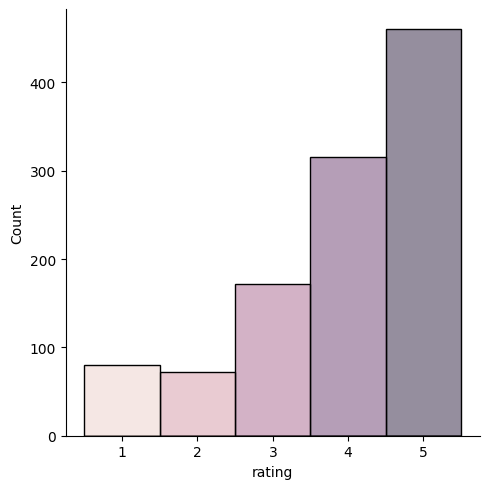

In [5]:
sns.displot(complete_dataset, x="rating", discrete=True, kde=True, hue="rating", legend=False)

In [6]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


In [7]:
complete_dataset.isna().sum() # no null values: a really good dataset?

business_name      0
author_name        0
text               0
photo              0
rating             0
rating_category    0
dtype: int64

In [8]:
print("List of Restaurants:\n", complete_dataset["business_name"].unique())
print()
print("Count = ", complete_dataset["business_name"].nunique())

List of Restaurants:
 ["Haci'nin Yeri - Yigit Lokantasi" 'Pizza Fellas' 'Cafe Inn' 'Riviera'
 'Sakip Usta Gaziantep' 'Imam Cagdas' 'Gold Semaver'
 'Fethiye Dondurmacisi' 'My Friends Burger' 'Mcdonalds Fethiye'
 'Pukka Marmaris' 'Starbucks Bodrum' 'Churchill Bistro' 'Leman Kultur'
 'Tatbak' 'Guzel Koy Cafe' 'Cemo Etliekmek' 'Korelee' 'Patso Burger'
 'Vefa Bozacisi' 'Salacak' 'Nusr-et' 'Tuana Restaurant' 'Cici Tantuni'
 'Bunbun Kas' 'Gulcimen Aspava' 'Nazar Cafe' 'Alsancak Firin' 'Sushico'
 'Sardalye' 'Kumrucu Omur' 'Kofteci Yusuf' 'Bogazkoy Restaurant' 'Nesh'
 'Flash' 'Metanet Lokantasi' 'Midpoint' 'Pecko Firin Atakum' 'Bilice'
 'Baruthane Pilavcisi' 'Medeniyetler Sofrasi' 'Backyard' 'Alavara' 'Zula'
 'Kafros Pizzeria' 'Kebabci Halil Usta' 'Abidin Tantuni' 'Ahsap Iskender'
 'Kasikla Restaurant' 'Askin Tostevi' 'Pizzeria Remo'
 'Diyarbakir Ocakbasi Palace' 'Kaliteci' 'Sanukiya' 'KFC' 'Kruvasan'
 'Midyeci Ahmet' 'Kalkanoglu Pilav' 'Monica Kitchen' 'Sevinc Pastanesi'
 'Hasan Usta' 'Magro' 

In [9]:
print("List of Authors:\n", complete_dataset["author_name"].unique())
print()
print("Count = ", complete_dataset["author_name"].nunique())

List of Authors:
 ['Gulsum Akar' 'Oguzhan Cetin' 'Yasin Kuyu' ... 'Ulkem Esen'
 'Ilkin Saymaz' 'Samet Selcuk']

Count =  1074


In [10]:
print("Number of reviews written by each author:\n", complete_dataset["author_name"].value_counts())
print()
multiple_rating_authors = complete_dataset["author_name"].value_counts() > 1
print("Count of authors who wrote multiple reviews =", len(multiple_rating_authors[multiple_rating_authors == True])) # 22 authors have written multiple reviews out of all the 1074 unique authors

Number of reviews written by each author:
 author_name
Nihat Karabiber     3
Ece Oztunc          3
Mustafa Ay          3
Saliha Senyildiz    3
Seda Seven          2
                   ..
Derya Al            1
Hilal Kaya          1
Resul Diri          1
Behcet Cengiz       1
Samet Selcuk        1
Name: count, Length: 1074, dtype: int64

Count of authors who wrote multiple reviews = 22


### Dropping photo path for now to focus on the rest of the dataset

In [11]:
dataset = complete_dataset.drop("photo", axis=1)
dataset

business_name      author_name  \
0     Haci'nin Yeri - Yigit Lokantasi      Gulsum Akar   
1     Haci'nin Yeri - Yigit Lokantasi    Oguzhan Cetin   
2     Haci'nin Yeri - Yigit Lokantasi       Yasin Kuyu   
3     Haci'nin Yeri - Yigit Lokantasi       Orhan Kapu   
4     Haci'nin Yeri - Yigit Lokantasi       Ozgur Sati   
...                               ...              ...   
1095                       Miss Pizza     Salih Gursoy   
1096                       Miss Pizza  Kemal Amangeldi   
1097                       Miss Pizza       Ulkem Esen   
1098                       Miss Pizza     Ilkin Saymaz   
1099                       Miss Pizza     Samet Selcuk   

                                                   text  rating  \
0     We went to Marmaris with my wife for a holiday...       5   
1     During my holiday in Marmaris we ate here to f...       4   
2     Prices are very affordable. The menu in the ph...       3   
3     Turkey's cheapest artisan restaurant and its f...       5   
4     I don't know what you will look for in terms o...       3   
...                                                 ...     ...   
1095  There are so many types of pizza; you are surp...       5   
1096  I tried the smoked ribeye pizza; the dough is ...       5   
1097                       Crowded and expensive place.       3   
1098  No bad. It was very crowded; there was no ligh...       3   
1099  Excellent pizza and fine wine. Both food and b...       4   

         rating_category  
0                  taste  
1                   menu  
2     outdoor_atmosphere  
3      indoor_atmosphere  
4                   menu  
...                  ...  
1095               taste  
1096   indoor_atmosphere  
1097                menu  
1098               taste  
1099  outdoor_atmosphere  

[1100 rows x 5 columns]

### Creating a text length column

In [12]:
dataset["text_length"] = [len(text) for text in dataset["text"]]
dataset

business_name      author_name  \
0     Haci'nin Yeri - Yigit Lokantasi      Gulsum Akar   
1     Haci'nin Yeri - Yigit Lokantasi    Oguzhan Cetin   
2     Haci'nin Yeri - Yigit Lokantasi       Yasin Kuyu   
3     Haci'nin Yeri - Yigit Lokantasi       Orhan Kapu   
4     Haci'nin Yeri - Yigit Lokantasi       Ozgur Sati   
...                               ...              ...   
1095                       Miss Pizza     Salih Gursoy   
1096                       Miss Pizza  Kemal Amangeldi   
1097                       Miss Pizza       Ulkem Esen   
1098                       Miss Pizza     Ilkin Saymaz   
1099                       Miss Pizza     Samet Selcuk   

                                                   text  rating  \
0     We went to Marmaris with my wife for a holiday...       5   
1     During my holiday in Marmaris we ate here to f...       4   
2     Prices are very affordable. The menu in the ph...       3   
3     Turkey's cheapest artisan restaurant and its f...       5   
4     I don't know what you will look for in terms o...       3   
...                                                 ...     ...   
1095  There are so many types of pizza; you are surp...       5   
1096  I tried the smoked ribeye pizza; the dough is ...       5   
1097                       Crowded and expensive place.       3   
1098  No bad. It was very crowded; there was no ligh...       3   
1099  Excellent pizza and fine wine. Both food and b...       4   

         rating_category  text_length  
0                  taste          680  
1                   menu          914  
2     outdoor_atmosphere          173  
3      indoor_atmosphere           63  
4                   menu          161  
...                  ...          ...  
1095               taste          159  
1096   indoor_atmosphere           66  
1097                menu           28  
1098               taste          112  
1099  outdoor_atmosphere           86  

[1100 rows x 6 columns]

## Rating vs text length

<Axes: xlabel='rating', ylabel='text_length'>

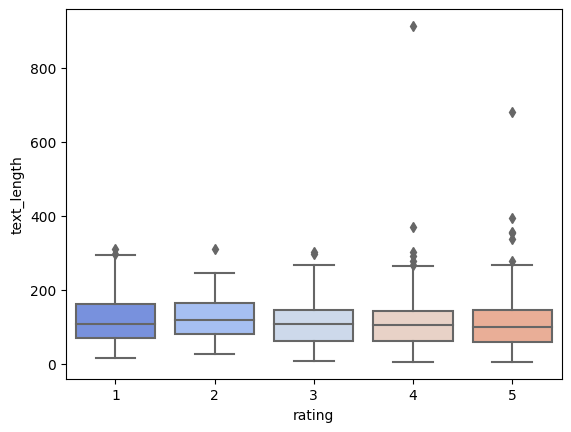

In [13]:
sns.boxplot(x=dataset["rating"], y=dataset["text_length"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


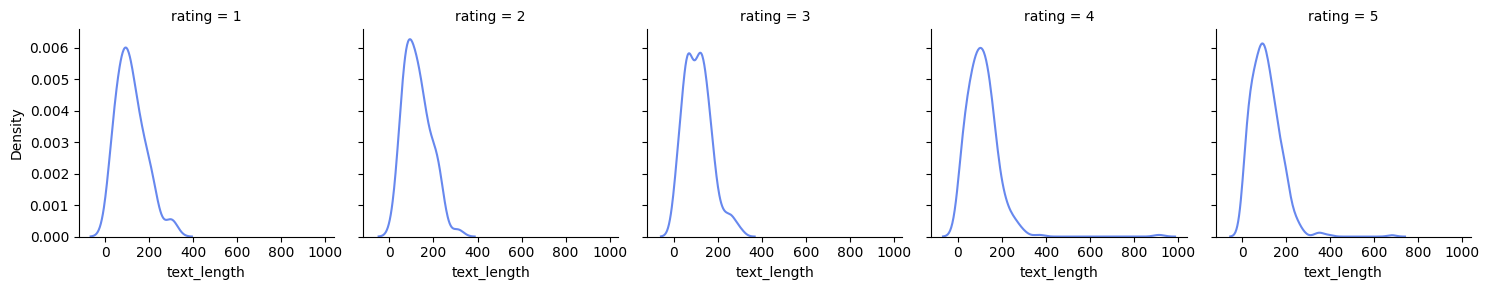

In [14]:
ratings = dataset["rating"].value_counts().index
grid = sns.FacetGrid(dataset, col="rating", row_order=ratings)
grid.map(sns.kdeplot, "text_length")

In [15]:
lengthwise_df = dataset.groupby("rating")

print("MEAN", lengthwise_df["text_length"].mean())
print()
print("MEDAIN", lengthwise_df["text_length"].median())

MEAN rating
1    117.837500
2    126.125000
3    109.052326
4    110.740506
5    107.956522
Name: text_length, dtype: float64

MEDAIN rating
1    107.0
2    117.5
3    107.0
4    104.0
5     99.0
Name: text_length, dtype: float64


#### The length of text reviews do not seem to have much of a change on what rating was given to the restaurant.

## Rating Category vs text length

<Axes: xlabel='rating_category', ylabel='text_length'>

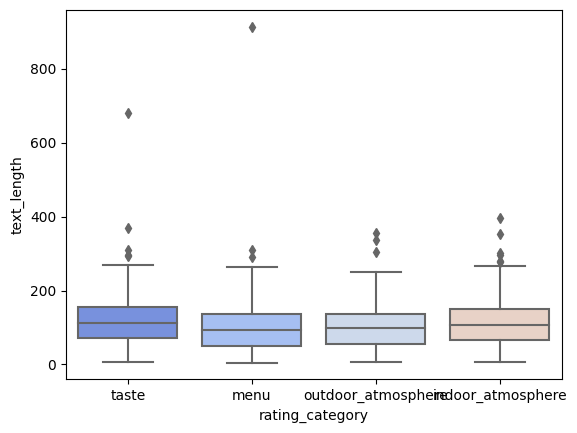

In [16]:
sns.boxplot(x=dataset["rating_category"], y=dataset["text_length"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


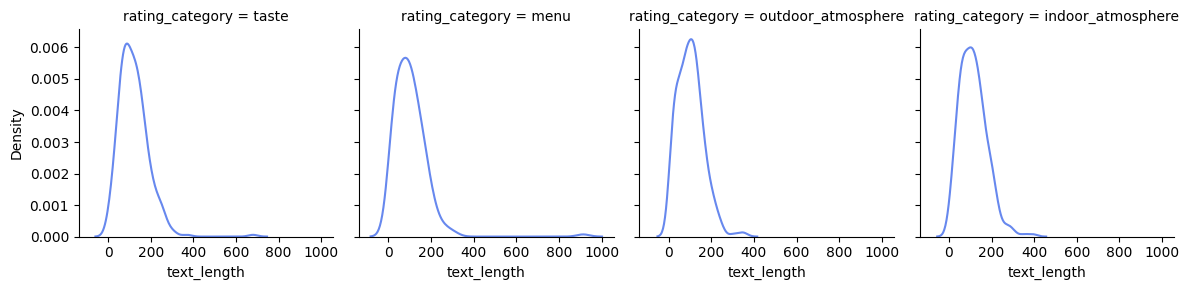

In [17]:
rating_categories = dataset["rating"].value_counts().index
grid = sns.FacetGrid(dataset, col="rating_category", row_order=rating_categories)
grid.map(sns.kdeplot, "text_length")

In [18]:
lengthwise_df2 = dataset.groupby("rating_category")

print("MEAN", lengthwise_df2["text_length"].mean())
print()
print("MEDAIN", lengthwise_df2["text_length"].median())

MEAN rating_category
indoor_atmosphere     114.149306
menu                  102.765306
outdoor_atmosphere    102.041958
taste                 120.357576
Name: text_length, dtype: float64

MEDAIN rating_category
indoor_atmosphere     107.5
menu                   92.0
outdoor_atmosphere     98.0
taste                 112.5
Name: text_length, dtype: float64


#### The length of text reviews also does not seem to correlate with the rating category.

## Building word clouds

In [19]:
import wordcloud as wc

#### Writing a function to generate word clouds:

In [20]:
def generate_wordcloud(data, stopwords=set(wc.STOPWORDS), title=''):
    comment_words = ''
    
    # iterate through the csv file
    for val in data:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
    
    wordcloud = wc.WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.title(title, fontsize=25)
    plt.axis("off")
    plt.tight_layout(pad = 0)

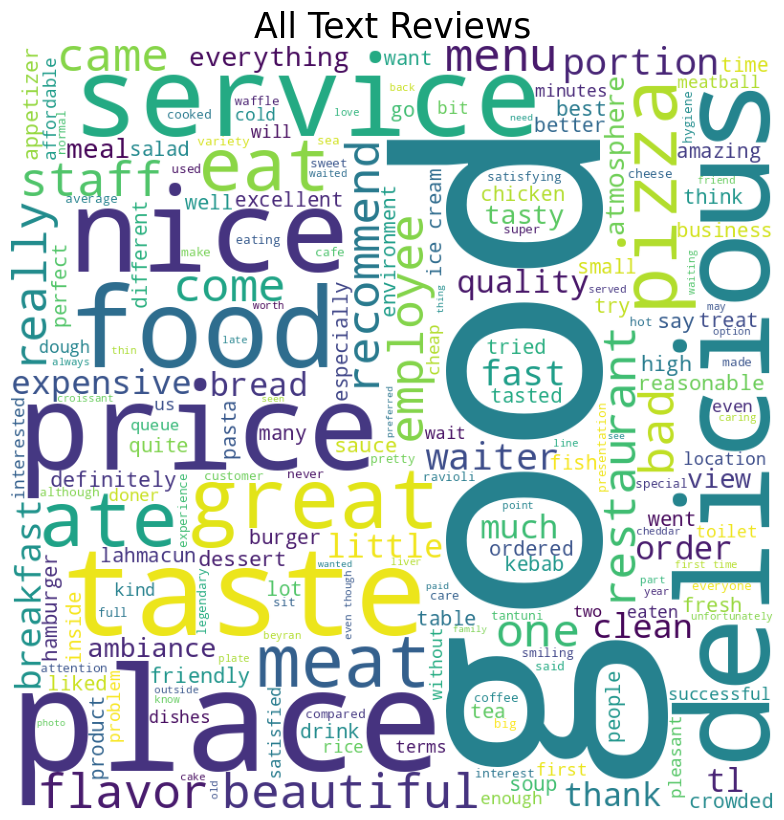

In [21]:
generate_wordcloud(dataset["text"], title="All Text Reviews")

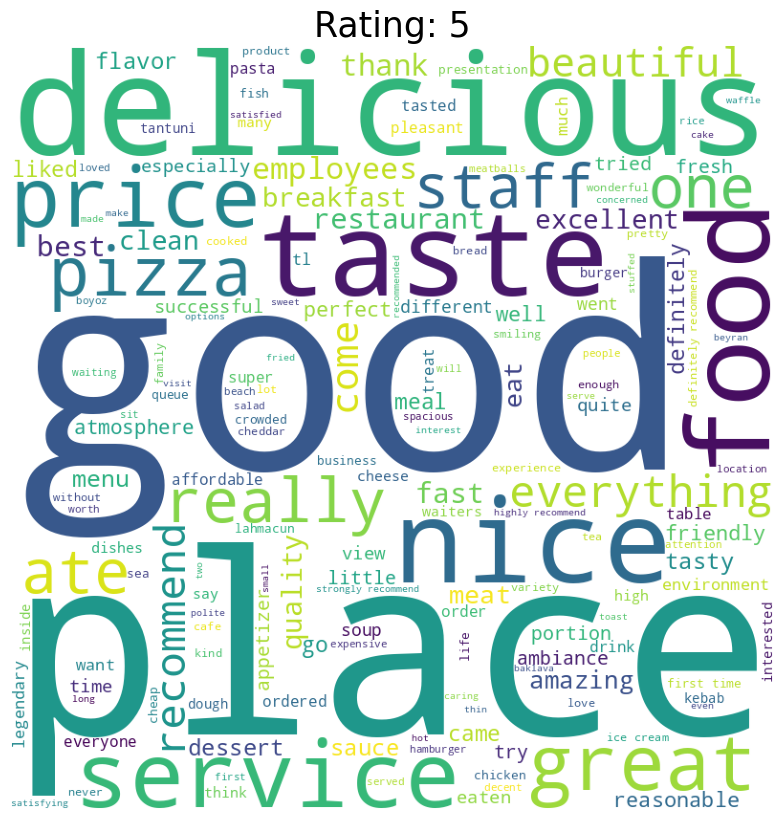

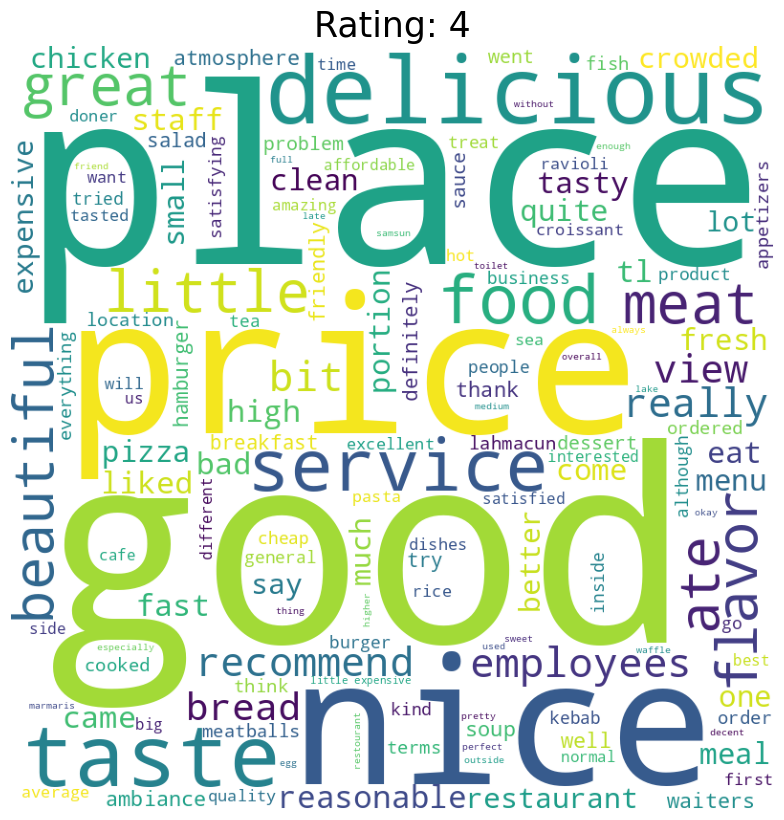

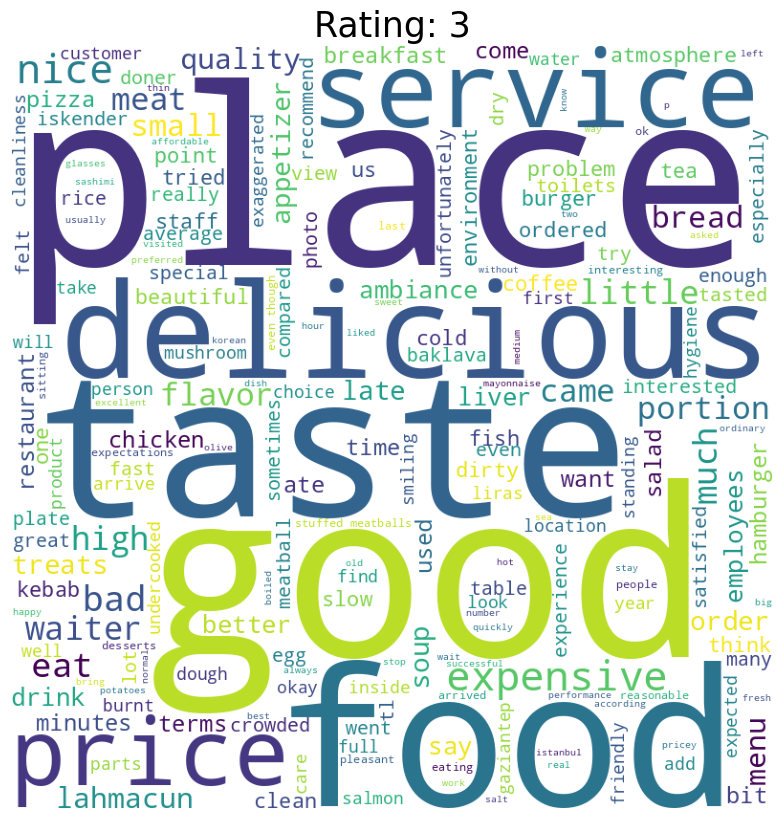

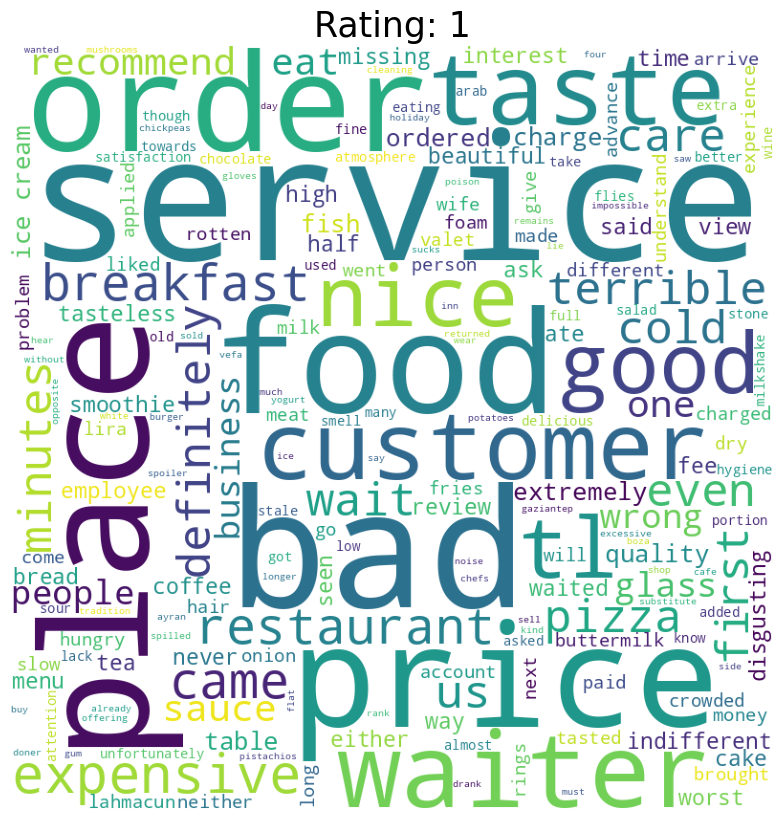

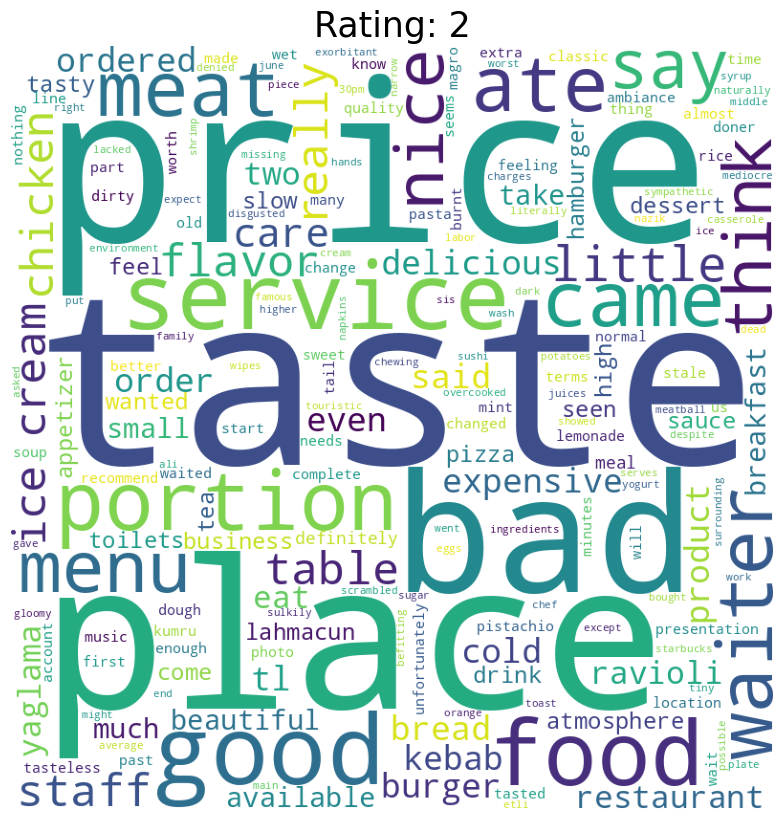

In [22]:
# Building a dictionary of each rating
rating_range = dataset["rating"].value_counts().index
rating_sorted_dict = {}

for rating in rating_range:
    rating_sorted_dict[rating] = dataset[dataset["rating"] == rating]

for rating, data in rating_sorted_dict.items():
    title = "Rating: " + str(rating)
    generate_wordcloud(rating_sorted_dict[rating]["text"], title=title)

#### It can be observed that there are some words like "place", "taste" which appear in all of the text ratings prominently. As these are neutral words which do not give any information about the reviews, these can be added to the stopwords. Moreover, it is worth going over the default stopwords and checking if any interesting words specific to this usecase are being neglected.

In [23]:
print(wc.STOPWORDS)

{'however', "he's", 'than', 'both', 'doing', "doesn't", "they're", 'with', "let's", 'com', 'own', 'because', 'being', 'here', "you'll", 'which', 'yourself', "hadn't", 'is', 'the', 'such', "there's", 'further', 'where', 'our', "they'd", 'had', 'they', 'against', 'any', 'once', 'should', 'his', "you've", 'whom', 'if', "won't", 'k', 'www', 'did', 'those', 'i', 'in', 'no', 'between', 'so', "who's", 'you', 'http', 'them', "here's", 'does', 'otherwise', "when's", 'there', 'too', 'been', 'most', 'her', 'their', "haven't", 'yours', 'over', 'themselves', "aren't", 'why', "isn't", 'have', 'him', 'only', 'myself', 'could', "didn't", 'we', 'when', 'out', 'before', "she'll", 'up', 'just', 'get', 'ought', 'my', 'a', 'at', 'on', "don't", 'then', 'be', 'how', 'since', 'am', 'until', 'through', "she's", "that's", 'after', 'me', "mustn't", 'some', 'hers', "we've", "we'll", "i've", "wouldn't", 'himself', 'more', 'cannot', 'again', 'as', 'was', "shouldn't", 'for', 'below', 'that', 'by', 'to', "they'll", '

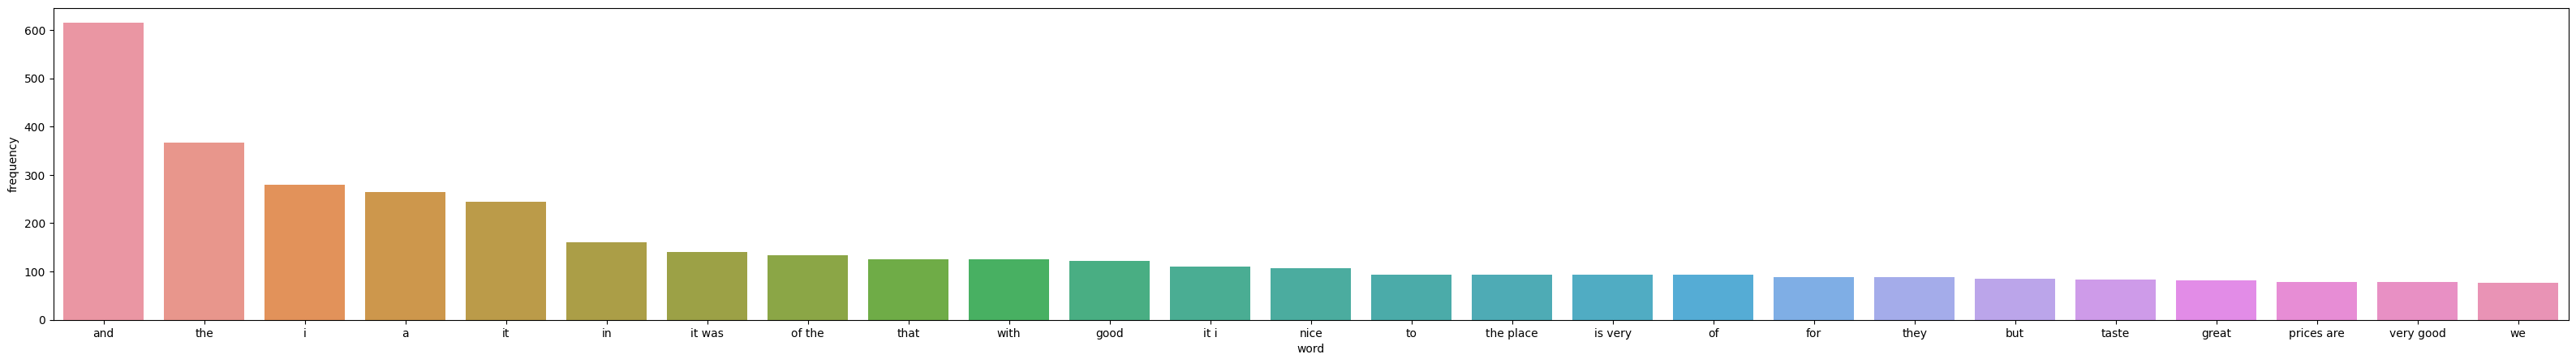

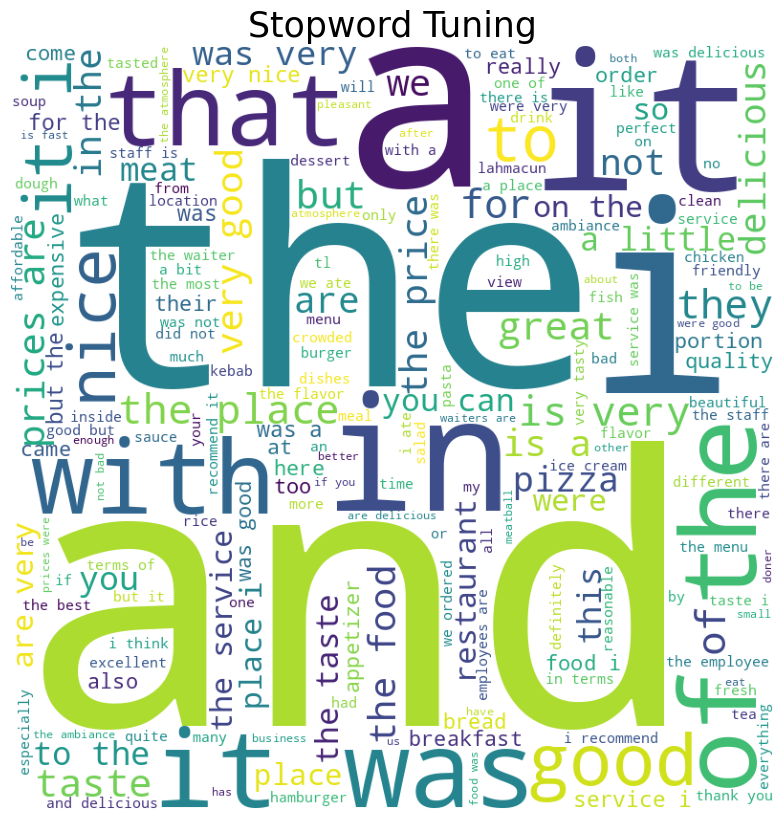

In [24]:
# Getting the most common words used in reviews:
all_text = [str(text) for text in dataset["text"]]
all_text_joined = ' '.join(all_text).lower()

wordcloud = wc.WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = set(),
                    min_font_size = 10).generate(all_text_joined)

text_dictionary = wordcloud.process_text(all_text_joined)

# sort the dictionary
word_freq=[(k, v) for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])]

word_freq[:100]
word_freq_df = pd.DataFrame(word_freq)
word_freq_df.rename(columns={0: "word", 1: "frequency"}, inplace=True)

fig, ax = plt.subplots(figsize=(40, 5))

sns.barplot(x=word_freq_df["word"][:25], y=word_freq_df["frequency"][:25])
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Stopword Tuning", fontsize=25)
plt.axis("off")
plt.tight_layout(pad = 0)

In [25]:
word_freq_df[:10]

word  frequency
0     and        615
1     the        367
2       i        279
3       a        265
4      it        244
5      in        160
6  it was        141
7  of the        134
8    that        126
9    with        125

{'however', '', "he's", 'than', 'both', 'doing', "doesn't", "they're", 'with', "let's", 'com', 'own', 'because', 'being', 'here', "you'll", 'which', 'yourself', "hadn't", 'is', 'the', 'such', "there's", 'further', 'place', 'where', 'our', "they'd", 'had', 'they', 'against', 'any', 'once', 'should', 'his', "you've", 'whom', 'if', "won't", 'k', 'www', 'did', 'those', 'i', 'in', 'no', 'between', 'so', "who's", 'you', 'http', 'them', "here's", 'does', 'otherwise', "when's", 'there', 'too', 'been', 'most', 'her', 'their', "haven't", 'yours', 'over', 'themselves', "aren't", 'why', "isn't", 'have', 'him', 'only', 'myself', 'could', "didn't", 'we', 'when', 'out', 'before', "she'll", 'up', 'just', 'get', 'ought', 'my', 'a', 'at', 'on', "don't", 'then', 'be', 'how', 'taste', 'since', 'am', 'until', 'through', "she's", "that's", 'after', 'me', "mustn't", 'some', 'hers', "we've", "we'll", "i've", "wouldn't", 'himself', 'more', 'cannot', 'again', 'as', 'was', "shouldn't", 'for', 'below', 'that', 'b

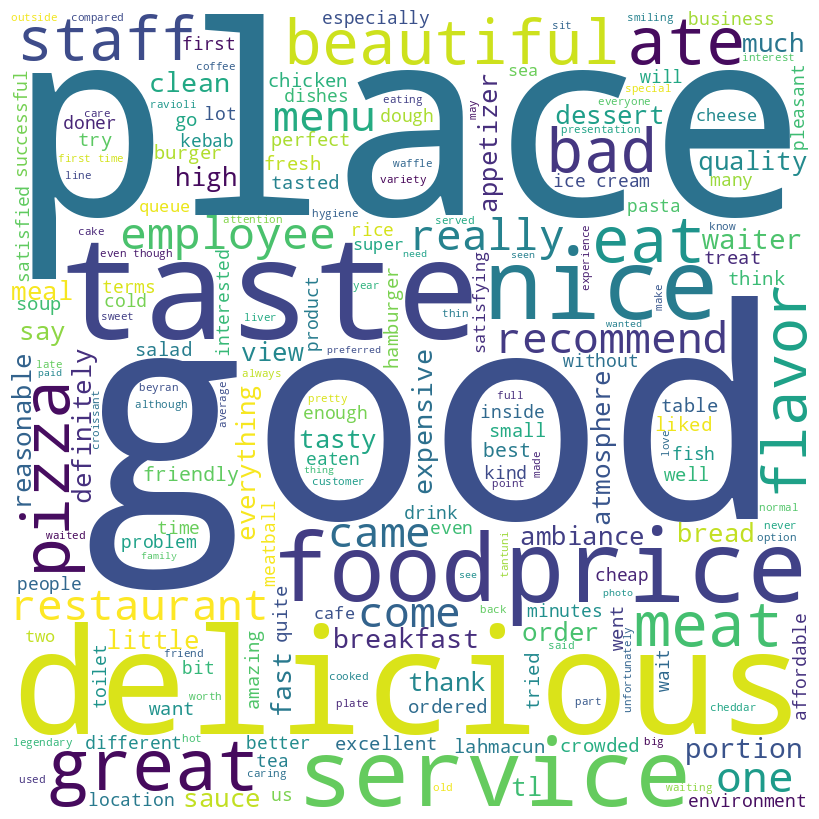

In [26]:
custom_stopwords = wc.STOPWORDS
custom_stopwords.add("taste")
custom_stopwords.add("place")
custom_stopwords.add("")
print(custom_stopwords)
generate_wordcloud(dataset["text"])